<a href="https://colab.research.google.com/github/22AD081/NLP-new/blob/main/NLP%20Ass-1%20new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers datasets torch seaborn matplotlib pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel, BertForSequenceClassification

# Load your uploaded dataset
file_path = "/content/Final_Augmented_dataset_Diseases_and_Symptoms.csv"
df = pd.read_csv(file_path)

# Display dataset columns to check where medical text is stored
print("Dataset Columns:", df.columns)

Dataset Columns: Index(['diseases', 'anxiety and nervousness', 'depression',
       'shortness of breath', 'depressive or psychotic symptoms',
       'sharp chest pain', 'dizziness', 'insomnia',
       'abnormal involuntary movements', 'chest tightness',
       ...
       'stuttering or stammering', 'problems with orgasm', 'nose deformity',
       'lump over jaw', 'sore in nose', 'hip weakness', 'back swelling',
       'ankle stiffness or tightness', 'ankle weakness', 'neck weakness'],
      dtype='object', length=378)


In [3]:
text_column = "diseases"
medical_notes = df[text_column].dropna().tolist()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.



🔍 Visualizing Attention for Medical Report 1:

panic disorder


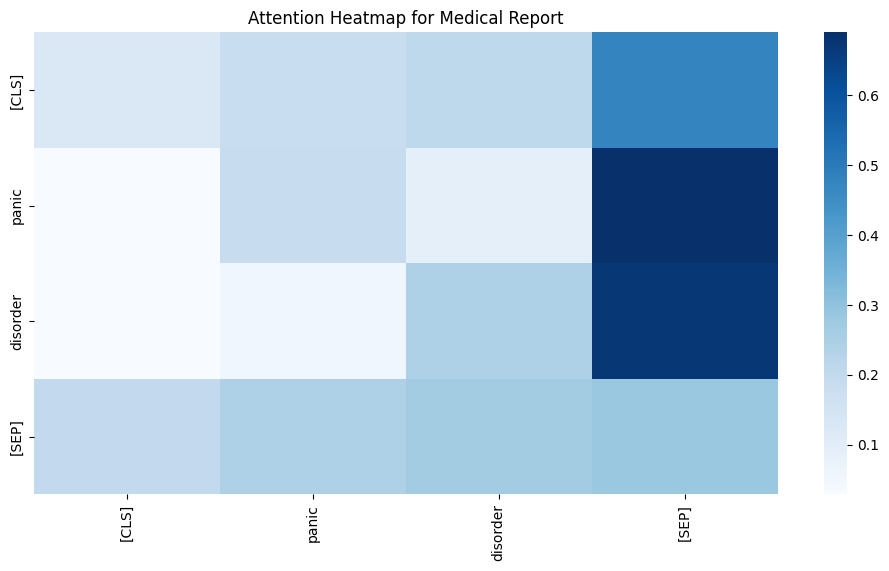


🔍 Visualizing Attention for Medical Report 2:

panic disorder


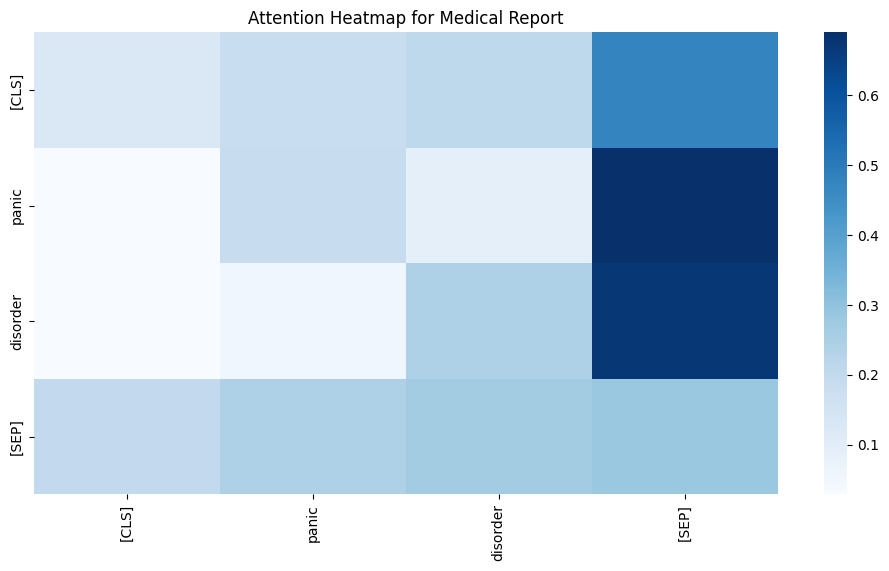


🔍 Visualizing Attention for Medical Report 3:

panic disorder


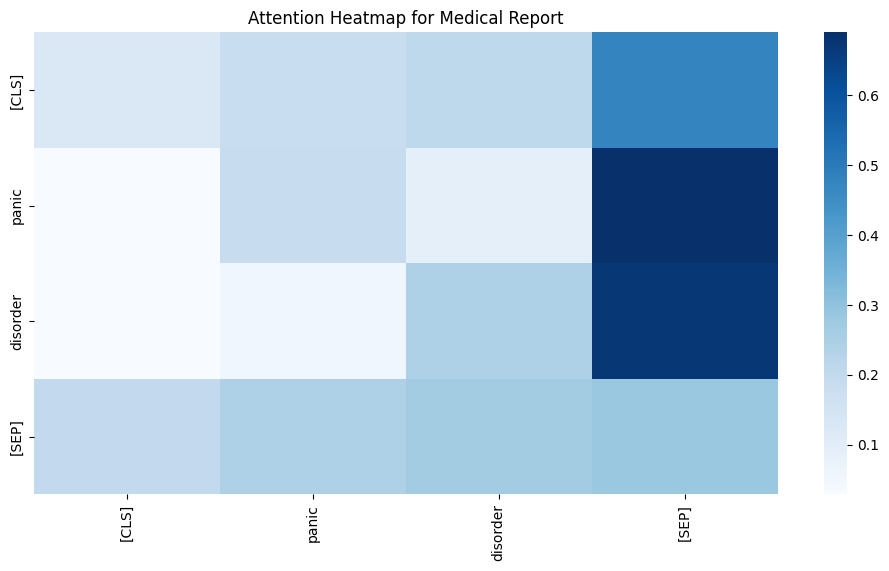


🔍 Visualizing Attention for Medical Report 4:

panic disorder


model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

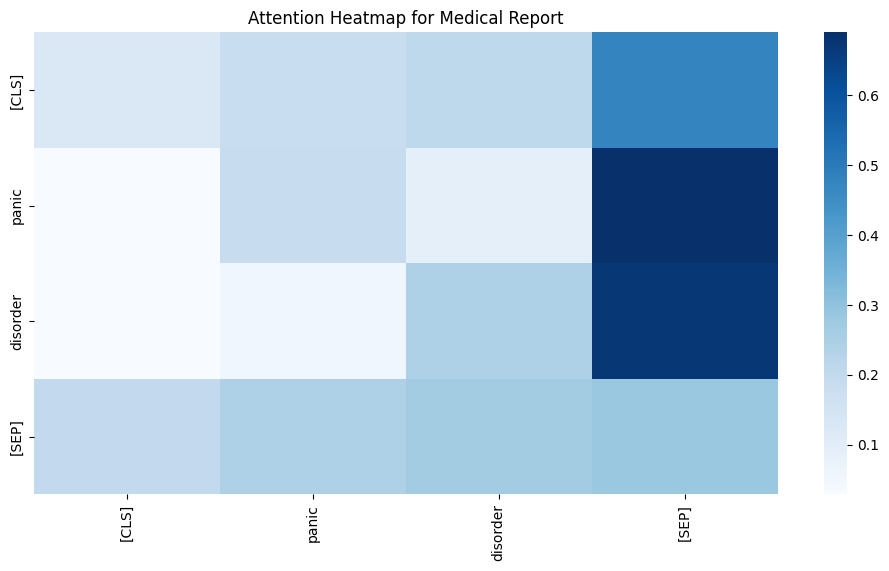


🔍 Visualizing Attention for Medical Report 5:

panic disorder


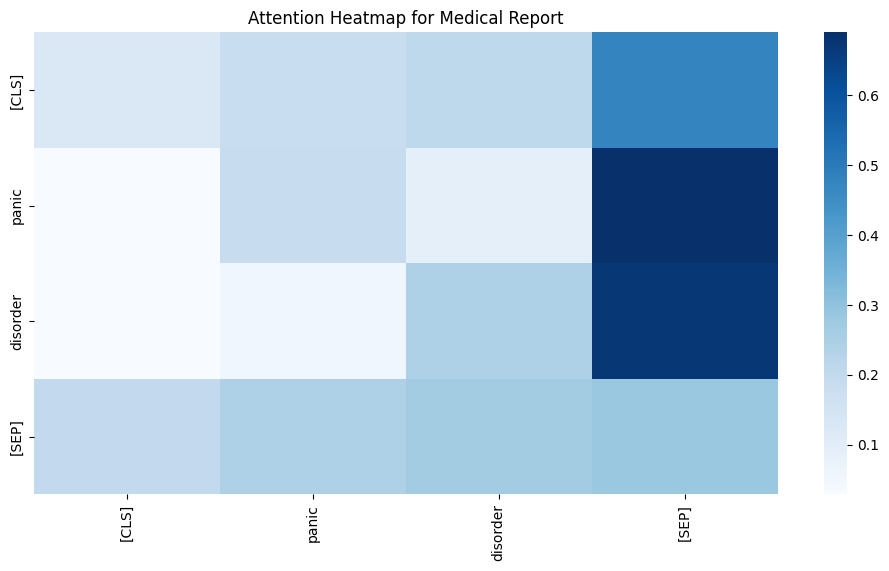

In [4]:
model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, output_attentions=True)

# Function to visualize attention heatmap
def visualize_attention(text, model, tokenizer):
    tokens = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**tokens)
    attentions = outputs.attentions[-1]

    attn_matrix = attentions[0].mean(dim=0).cpu().numpy()
    tokenized_text = tokenizer.convert_ids_to_tokens(tokens["input_ids"][0])
    num_tokens = len(tokenized_text)
    attn_matrix = attn_matrix[:num_tokens, :num_tokens]

    # Plot attention heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(attn_matrix, xticklabels=tokenized_text, yticklabels=tokenized_text, cmap="Blues", annot=False)
    plt.title("Attention Heatmap for Medical Report")
    plt.xticks(rotation=90)
    plt.show()

# Visualize attention for the first 5 medical reports
for i, note in enumerate(medical_notes[:5]):  # Adjust range as needed
    print(f"\n🔍 Visualizing Attention for Medical Report {i+1}:\n")
    print(note)
    visualize_attention(note, model, tokenizer)

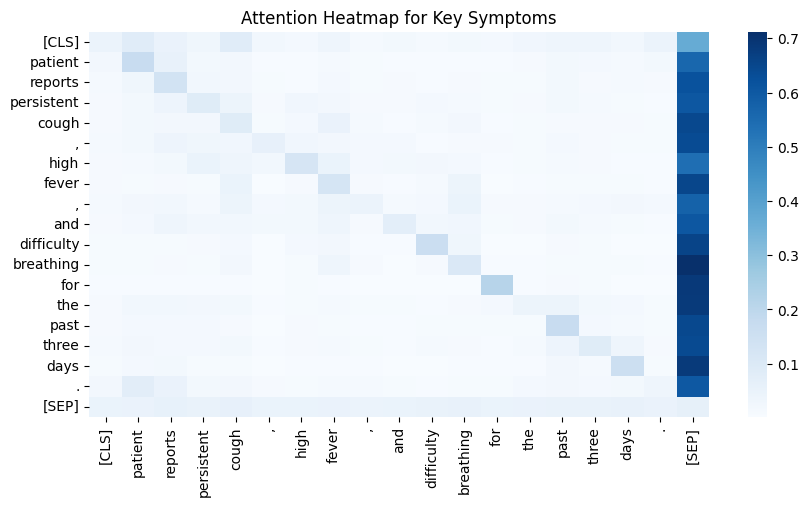

In [5]:

# Define medical note
medical_note_1 = "Patient reports persistent cough, high fever, and difficulty breathing for the past three days."

# Tokenize the text
inputs = tokenizer(medical_note_1, return_tensors="pt", truncation=True, padding=True)
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Get model outputs
with torch.no_grad():
    outputs = model(**inputs, output_attentions=True)
attention = outputs.attentions[-1].squeeze(0).mean(0)  # Averaging across heads

# Convert attention matrix to numpy
attn_matrix = attention.numpy()

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(attn_matrix, xticklabels=tokens, yticklabels=tokens, cmap="Blues", annot=False)
plt.title("Attention Heatmap for Key Symptoms")
plt.xticks(rotation=90)
plt.show()


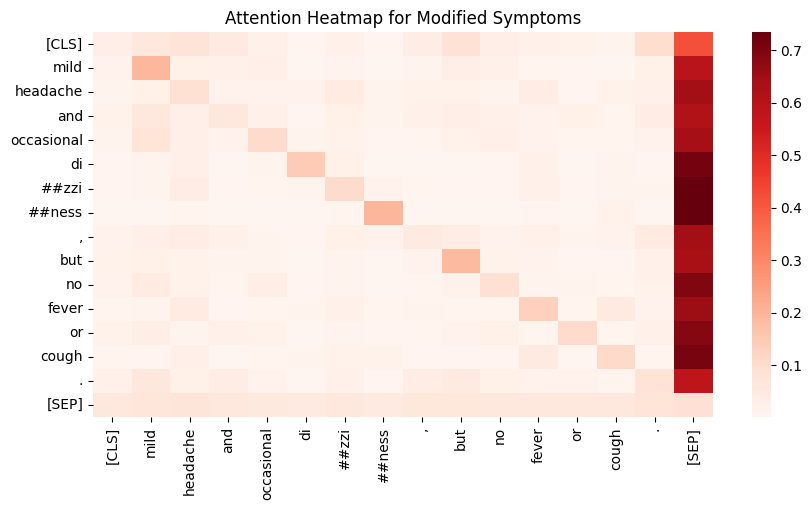

In [6]:

# Define modified medical note
medical_note_2 = "Mild headache and occasional dizziness, but no fever or cough."

# Tokenize and process
inputs_2 = tokenizer(medical_note_2, return_tensors="pt", truncation=True, padding=True)
tokens_2 = tokenizer.convert_ids_to_tokens(inputs_2["input_ids"][0])

# Get model outputs
with torch.no_grad():
    outputs_2 = model(**inputs_2, output_attentions=True)
attention_2 = outputs_2.attentions[-1].squeeze(0).mean(0)

# Convert to numpy
attn_matrix_2 = attention_2.numpy()

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(attn_matrix_2, xticklabels=tokens_2, yticklabels=tokens_2, cmap="Reds", annot=False)
plt.title("Attention Heatmap for Modified Symptoms")
plt.xticks(rotation=90)
plt.show()


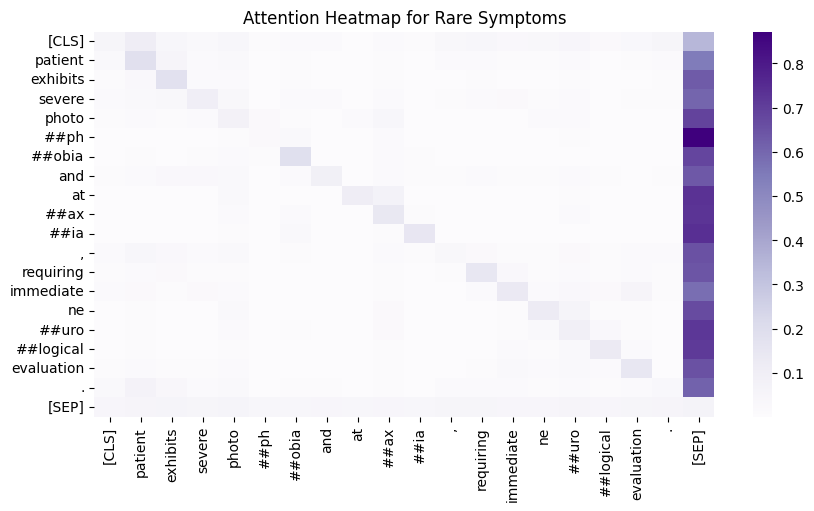

In [7]:

# Define rare symptom case
medical_note_3 = "Patient exhibits severe photophobia and ataxia, requiring immediate neurological evaluation."

# Tokenize and process
inputs_3 = tokenizer(medical_note_3, return_tensors="pt", truncation=True, padding=True)
tokens_3 = tokenizer.convert_ids_to_tokens(inputs_3["input_ids"][0])

# Get model outputs
with torch.no_grad():
    outputs_3 = model(**inputs_3, output_attentions=True)
attention_3 = outputs_3.attentions[-1].squeeze(0).mean(0)

# Convert to numpy
attn_matrix_3 = attention_3.numpy()

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(attn_matrix_3, xticklabels=tokens_3, yticklabels=tokens_3, cmap="Purples", annot=False)
plt.title("Attention Heatmap for Rare Symptoms")
plt.xticks(rotation=90)
plt.show()
